In [2]:
import pandas as pd
import geopandas as gpd
#all streets in New York
scl = gpd.read_file('fixed_streets.geojson')
scl

,roadway_type,bike_lane,snow_priority,boro_code,roadway_name,street_id,st_width,geometry
0,1,0,1,1,battery place,42,C,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,1,0,1,1,battery place,42,C,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,1,0,1,1,battery place,42,C,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,1,0,1,1,battery place,42,C,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,1,0,1,1,battery place,24,C,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."
...,...,...,...,...,...,...,...,...
120167,6,0,6,2,co-op city pedestrian path,0,N,"MULTILINESTRING ((-73.82562 40.87750, -73.8251..."
120168,6,0,6,2,co-op city pedestrian path,0,N,"MULTILINESTRING ((-73.82562 40.87750, -73.8254..."
120169,1,2,1,2,3 avenue,45,C,"MULTILINESTRING ((-73.92931 40.80948, -73.9292..."
120170,1,2,1,2,3 avenue,45,C,"MULTILINESTRING ((-73.92936 40.80944, -73.9293..."


In [11]:
import pandas as pd
import geopandas as gpd

#traffic volume csv
traffic=pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/capstone_project/master/data/Traffic_Volume_Counts__2014-2019_.csv')
traffic.head(5)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


### Fix difference on street names

In [12]:
traffic['Roadway Name'] = traffic['Roadway Name'].str.lower()
traffic['From'] = traffic['From'].str.lower()
traffic['To'] = traffic['To'].str.lower()
traffic.head(5)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 avenue,east 154 street,east 155 street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 avenue,east 155 street,east 154 street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,bedford park boulevard,grand concourse,valentine avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,bedford park boulevard,grand concourse,valentine avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,broadway,west 242 street,240 street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


In [13]:
traffic['Roadway Name'] = traffic['Roadway Name'].str.replace('east ', 'e ') 
traffic['From'] = traffic['From'].str.replace('east ', 'e ') 
traffic['To'] = traffic['To'].str.replace('east ', 'e ') 
traffic['Roadway Name'] = traffic['Roadway Name'].str.replace('west ', 'w ') 
traffic['From'] = traffic['From'].str.replace('west ', 'w ') 
traffic['To'] = traffic['To'].str.replace('west ', 'w ') 

In [9]:
geom_df = scl[['roadway_name' , 'geometry'] ]
geom_df.head(3)

,roadway_name,geometry
0,battery place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,battery place,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,battery place,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."


### Get surrounding streets from geojson 

In [10]:
gdf= geom_df.loc[0:10000]
gdf1= geom_df.loc[10000:20000]
gdf2 = geom_df.loc[20000:30000]
gdf3 = geom_df.loc[30000:40000]
gdf4 = geom_df.loc[40000:50000]
gdf5 = geom_df.loc[50000:60000]
gdf6 = geom_df.loc[60000:70000]
gdf7 = geom_df.loc[70000:80000]
gdf8 = geom_df.loc[80000:90000]
gdf9 = geom_df.loc[90000:100000]
gdf10 = geom_df.loc[100000:110000]
gdf11 = geom_df.loc[110000:120172]

In [11]:
# re run this cell for every gdf 1-11
gdf["NEIGHBORS"] = None 

for index, street in gdf.iterrows():
    neighbors = gdf[gdf.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf.to_file("streets_gdf_0.geojson", driver='GeoJSON')


/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [12]:
gdf1["NEIGHBORS"] = None 

for index, street in gdf1.iterrows():
    neighbors = gdf1[gdf1.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf1.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf1.to_file("streets_gdf_1.geojson", driver='GeoJSON')

In [13]:
gdf2["NEIGHBORS"] = None 

for index, street in gdf2.iterrows():
    neighbors = gdf2[gdf2.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf2.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf2.to_file("streets_gdf_2.geojson", driver='GeoJSON')

In [14]:
gdf3["NEIGHBORS"] = None 

for index, street in gdf3.iterrows():
    neighbors = gdf3[gdf3.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf3.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf3.to_file("streets_gdf_3.geojson", driver='GeoJSON')

In [15]:
gdf4["NEIGHBORS"] = None 

for index, street in gdf4.iterrows():
    neighbors = gdf4[gdf4.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf4.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf4.to_file("streets_gdf_4.geojson", driver='GeoJSON')

In [16]:
gdf5["NEIGHBORS"] = None 

for index, street in gdf5.iterrows():
    neighbors = gdf5[gdf5.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf5.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf5.to_file("streets_gdf_5.geojson", driver='GeoJSON')

In [17]:
gdf6["NEIGHBORS"] = None 

for index, street in gdf6.iterrows():
    neighbors = gdf6[gdf6.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf6.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf6.to_file("streets_gdf_6.geojson", driver='GeoJSON')

In [18]:
gdf7["NEIGHBORS"] = None 

for index, street in gdf7.iterrows():
    neighbors = gdf7[gdf7.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf7.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf7.to_file("streets_gdf_7.geojson", driver='GeoJSON')

In [19]:
gdf8["NEIGHBORS"] = None 

for index, street in gdf8.iterrows():
    neighbors = gdf8[gdf8.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf8.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf8.to_file("streets_gdf_8.geojson", driver='GeoJSON')

In [20]:
gdf9["NEIGHBORS"] = None 

for index, street in gdf9.iterrows():
    neighbors = gdf9[gdf9.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf9.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf9.to_file("streets_gdf_9.geojson", driver='GeoJSON')

In [21]:
gdf10["NEIGHBORS"] = None 

for index, street in gdf10.iterrows():
    neighbors = gdf10[gdf10.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf10.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf10.to_file("streets_gdf_10.geojson", driver='GeoJSON')

In [22]:
gdf11["NEIGHBORS"] = None 

for index, street in gdf11.iterrows():
    neighbors = gdf11[gdf11.geometry.touches(street['geometry'])].roadway_name.tolist()
    neighbors = [ name for name in neighbors if street.roadway_name != name ]
    neighbor = list(set(neighbors))
    gdf11.at[index, "NEIGHBORS"] = ", ".join(neighbor)
    # save GeoDataFrame as a new file
gdf11.to_file("streets_gdf_11.geojson", driver='GeoJSON')

In [5]:
gdf = gpd.read_file('streets_gdf_0.geojson')
gdf1 = gpd.read_file('streets_gdf_1.geojson')
gdf2 = gpd.read_file('streets_gdf_2.geojson')
gdf3 = gpd.read_file('streets_gdf_3.geojson')
gdf4 = gpd.read_file('streets_gdf_4.geojson')
gdf5 = gpd.read_file('streets_gdf_5.geojson')
gdf6 = gpd.read_file('streets_gdf_6.geojson')
gdf7 = gpd.read_file('streets_gdf_7.geojson')
gdf8 = gpd.read_file('streets_gdf_8.geojson')
gdf9 = gpd.read_file('streets_gdf_9.geojson')
gdf10 = gpd.read_file('streets_gdf_10.geojson')
gdf11 = gpd.read_file('streets_gdf_11.geojson')

In [6]:
st = pd.concat([gdf, gdf1, gdf2, gdf3, gdf4, gdf5, gdf6, gdf7, gdf8, gdf9, gdf10, gdf11])
st.head(3)

,roadway_name,NEIGHBORS,geometry
0,battery place,1 place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,battery place,,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,battery place,w thames street,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."


In [7]:
st

,roadway_name,NEIGHBORS,geometry
0,battery place,1 place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,battery place,,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,battery place,w thames street,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,battery place,,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,battery place,state street,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."
...,...,...,...
10167,co-op city pedestrian path,cooper place,"MULTILINESTRING ((-73.82562 40.87750, -73.8251..."
10168,co-op city pedestrian path,carver loop,"MULTILINESTRING ((-73.82562 40.87750, -73.8254..."
10169,3 avenue,major deegan expresspway,"MULTILINESTRING ((-73.92931 40.80948, -73.9292..."
10170,3 avenue,major deegan expresspway,"MULTILINESTRING ((-73.92936 40.80944, -73.9293..."


In [8]:
st['NEIGHBORS']= st['NEIGHBORS'].replace('""', '-')

In [9]:
# new data frame with split value columns
new = st["NEIGHBORS"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
st["To"]= new[0]
  
# making separate last name column from new data frame
st["From"]= new[1]
  
# Dropping old Name columns
st.drop(columns =["NEIGHBORS"], inplace = True)
  
# df display
st.head(15)

,roadway_name,geometry,To,From
0,battery place,"MULTILINESTRING ((-74.01793 40.70617, -74.0178...",1 place,None
1,battery place,"MULTILINESTRING ((-74.01757 40.70684, -74.0171...",,None
2,battery place,"MULTILINESTRING ((-74.01712 40.70746, -74.0166...",w thames street,None
3,battery place,"MULTILINESTRING ((-74.01694 40.70481, -74.0170...",,None
4,battery place,"MULTILINESTRING ((-74.01429 40.70455, -74.0143...",state street,None
5,w thames street,"MULTILINESTRING ((-74.01740 40.70846, -74.0181...",,None
6,w thames street,"MULTILINESTRING ((-74.01663 40.70813, -74.0174...",battery place,None
7,w thames street,"MULTILINESTRING ((-74.01617 40.70790, -74.0166...",battery place,None
8,1 place,"MULTILINESTRING ((-74.01700 40.70580, -74.0179...",battery place,None
9,1 place,"MULTILINESTRING ((-74.01793 40.70617, -74.0186...",battery place,None


In [14]:
traffic = traffic.rename(columns={
    'Roadway Name':'roadway_name'
})

### Join Geographic Data to Traffic Volumes

In [66]:
df = traffic.merge(st, how='inner', left_on=['roadway_name','From'], right_on=['To','roadway_name'])
df

,ID,Segment ID,roadway_name_x,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,roadway_name_y,geometry,To_y,From_y
0,62,147673,broadway,w 242 street,240 street,SB,09/13/2014,255.0,209.0,149.0,...,641,556,546,465,425,324,w 242 street,"MULTILINESTRING ((-73.89837 40.88946, -73.8984...",broadway,None
1,62,147673,broadway,w 242 street,240 street,SB,09/13/2014,255.0,209.0,149.0,...,641,556,546,465,425,324,w 242 street,"MULTILINESTRING ((-73.89846 40.88948, -73.8993...",broadway,manhattan college parkway
2,62,158447,broadway,w 242 street,240 street,NB,09/13/2014,255.0,209.0,149.0,...,641,556,546,465,425,324,w 242 street,"MULTILINESTRING ((-73.89837 40.88946, -73.8984...",broadway,None
3,62,158447,broadway,w 242 street,240 street,NB,09/13/2014,255.0,209.0,149.0,...,641,556,546,465,425,324,w 242 street,"MULTILINESTRING ((-73.89846 40.88948, -73.8993...",broadway,manhattan college parkway
4,62,255653,broadway,w 242 street,240 street,SB,09/13/2014,87.0,86.0,78.0,...,181,167,144,129,112,103,w 242 street,"MULTILINESTRING ((-73.89837 40.88946, -73.8984...",broadway,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,338,43033,throop avenue,jefferson avenue,hancock street,NB,11/13/2019,95.0,49.0,42.0,...,327,329,296,264,199,196,jefferson avenue,"MULTILINESTRING ((-73.94404 40.68397, -73.9412...",throop avenue,tompkins avenue
9932,338,43033,throop avenue,jefferson avenue,hancock street,NB,11/14/2019,117.0,86.0,42.0,...,360,305,332,268,248,181,jefferson avenue,"MULTILINESTRING ((-73.94404 40.68397, -73.9412...",throop avenue,tompkins avenue
9933,338,43033,throop avenue,jefferson avenue,hancock street,NB,11/15/2019,136.0,101.0,50.0,...,368,387,406,337,286,246,jefferson avenue,"MULTILINESTRING ((-73.94404 40.68397, -73.9412...",throop avenue,tompkins avenue
9934,338,43033,throop avenue,jefferson avenue,hancock street,NB,11/16/2019,216.0,160.0,126.0,...,403,378,330,320,297,233,jefferson avenue,"MULTILINESTRING ((-73.94404 40.68397, -73.9412...",throop avenue,tompkins avenue


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10852 entries, 0 to 10851
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             10852 non-null  int64   
 1   Segment ID     10852 non-null  int64   
 2   roadway_name   10852 non-null  object  
 3   From_x         10852 non-null  object  
 4   To_x           10852 non-null  object  
 5   Direction      10852 non-null  object  
 6   Date           10852 non-null  object  
 7   12:00-1:00 AM  10852 non-null  float64 
 8   1:00-2:00AM    10852 non-null  float64 
 9   2:00-3:00AM    10852 non-null  float64 
 10  3:00-4:00AM    10852 non-null  float64 
 11  4:00-5:00AM    10852 non-null  float64 
 12  5:00-6:00AM    10852 non-null  float64 
 13  6:00-7:00AM    10852 non-null  float64 
 14  7:00-8:00AM    10852 non-null  float64 
 15  8:00-9:00AM    10852 non-null  float64 
 16  9:00-10:00AM   10852 non-null  float64 
 17  10:00-11:00AM  10852 non-null  

In [59]:
df = traffic.merge(st, how='left', on=['roadway_name','To'])
df

,ID,Segment ID,roadway_name,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,geometry,From_y
0,2,70376,3 avenue,e 154 street,e 155 street,NB,09/13/2014,204.0,177.0,133.0,...,573,546,582,528,432,328,282,240,None,NaN
1,2,70376,3 avenue,e 155 street,e 154 street,SB,09/13/2014,140.0,51.0,128.0,...,329,362,418,335,282,247,237,191,None,NaN
2,56,176365,bedford park boulevard,grand concourse,valentine avenue,EB,09/13/2014,94.0,73.0,65.0,...,264,236,213,190,199,183,147,103,None,NaN
3,56,176365,bedford park boulevard,grand concourse,valentine avenue,WB,09/13/2014,88.0,82.0,75.0,...,223,240,217,198,186,162,157,103,None,NaN
4,62,147673,broadway,w 242 street,240 street,SB,09/13/2014,255.0,209.0,149.0,...,707,675,641,556,546,465,425,324,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32234,371,37916,3 avenue,e 99 street,e 100 street,NB,10/16/2019,297.0,155.0,162.0,...,468,466,259,352,367,330,285,254,None,NaN
32235,371,37916,3 avenue,e 99 street,e 100 street,NB,10/17/2019,181.0,107.0,78.0,...,679,729,432,477,506,460,398,388,None,NaN
32236,371,37916,3 avenue,e 99 street,e 100 street,NB,10/18/2019,248.0,161.0,115.0,...,868,807,544,487,423,400,336,313,None,NaN
32237,371,37916,3 avenue,e 99 street,e 100 street,NB,10/19/2019,251.0,195.0,132.0,...,421,407,374,361,356,391,450,495,None,NaN


In [32]:
#handle dates
df['Date']=pd.to_datetime(df.Date, format="%m/%d/%Y")
df['year'] = df['Date'].dt.year

df['month'] = df['Date'].dt.month

df['day'] = df['Date'].dt.day

In [27]:
df = df.drop(columns=['From_y'])

#### From the traffic volume dataset with 27000 observations, we were able to find 10000 in both datasets.

#### data hours where there were 0 cars as an indicator of a closed street

In [28]:
#handle dimensionality
df['morning_rush'] = traffic['6:00-7:00AM'] + traffic['7:00-8:00AM'] + traffic['8:00-9:00AM'] + traffic['9:00-10:00AM'] + traffic['10:00-11:00AM']
df['midday'] = traffic['11:00-12:00PM'] + traffic['12:00-1:00PM'] + traffic['1:00-2:00PM'] + traffic['2:00-3:00PM'] + traffic['3:00-4:00PM']
df['afternoon_rush'] = traffic['4:00-5:00PM'] + traffic['5:00-6:00PM'] + traffic['6:00-7:00PM'] + traffic['7:00-8:00PM']
df['evening'] = traffic['8:00-9:00PM'] + traffic['9:00-10:00PM'] + traffic['10:00-11:00PM'] + traffic['11:00-12:00AM'] + traffic['12:00-1:00 AM']
df['night'] = traffic['1:00-2:00AM'] + traffic['2:00-3:00AM'] + traffic['3:00-4:00AM'] + traffic['4:00-5:00AM'] + traffic['5:00-6:00AM'] 
df['total'] = df['morning_rush'] + df['midday']+df['afternoon_rush']+df['evening']+df['night']

In [94]:
closed = df.loc[(df['6:00-7:00AM'] ==0 )| 
            (df['7:00-8:00AM'] ==0 )|
            (df['8:00-9:00AM'] ==0)|
            (df['9:00-10:00AM'] ==0)|
            (df['10:00-11:00AM'] ==0)|
            (df['11:00-12:00PM'] ==0)|
            (df['12:00-1:00PM'] ==0)|
            (df['1:00-2:00PM'] ==0)|
            (df['2:00-3:00PM'] ==0)|
            (df['3:00-4:00PM'] ==0)|
            (df['4:00-5:00PM'] ==0)|
            (df['5:00-6:00PM'] ==0)|
            (df['6:00-7:00PM'] ==0)|
            (df['7:00-8:00PM'] ==0)|
            (df['8:00-9:00PM'] ==0)|
            (df['9:00-10:00PM'] ==0)|
            (df['10:00-11:00PM'] ==0)|
            (df['11:00-12:00PM'] ==0)|
            (df['12:00-1:00 AM'] ==0)|
            (df['1:00-2:00AM'] ==0)|
            (df['2:00-3:00AM'] ==0)|
            (df['3:00-4:00AM'] ==0)|
            (df['4:00-5:00AM'] ==0)|
            (df['5:00-6:00AM'] ==0)]

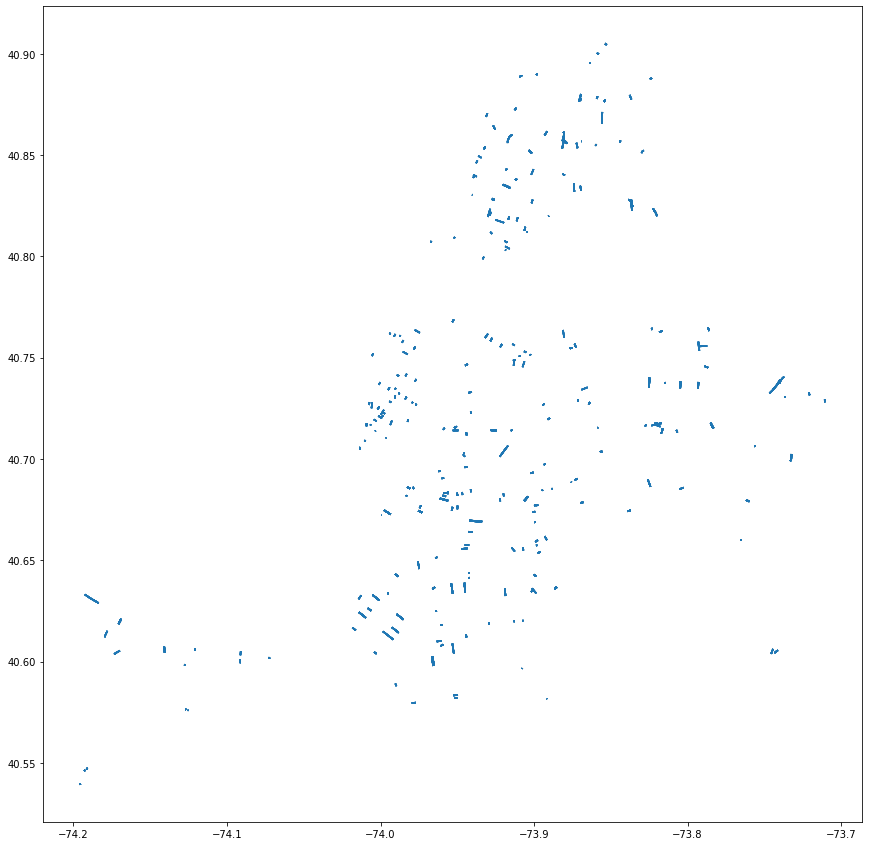

In [29]:
data = df[['roadway_name', 'geometry']]
gdata = gpd.GeoDataFrame(data, geometry='geometry')
gdata.plot(figsize=(30, 15))

In [ ]:
#Working sets are close gdf and df

In [30]:
closed_streets=pd.read_csv('closed_streets.csv')
closed_streets.head(5)

,Unnamed: 0,NODEID,ONSTREETNAME,FROMSTREETNAME,BOROUGH_CODE,DateTime,DateTimeEnd,Date,Time,year,month,day,DateEnd,difference
0,0,13010,canal avenue,w 17 street,B,2018-05-17 00:00:00,2018-05-21 23:59:59,2018-05-17,23:59:59,2018,5,21,2018-05-21,4 days 23:59:59
1,1,13011,belt parkway eb en cropsey avenue sb,bay 52 street,B,2018-05-17 00:00:00,2018-05-21 23:59:59,2018-05-17,23:59:59,2018,5,21,2018-05-21,4 days 23:59:59
2,2,108018,riverside boulevard,w 63 street,M,2017-12-04 00:00:00,2017-12-05 23:59:59,2017-12-04,23:59:59,2017,12,5,2017-12-05,1 days 23:59:59
3,3,101964,87 avenue,233 street,Q,2017-10-06 14:10:27,2018-01-01 23:58:59,2017-10-06,23:58:59,2018,1,1,2018-01-01,87 days 09:48:32
4,4,17361,avenue k,e 7 street,B,2017-07-31 00:00:00,2017-08-02 23:59:59,2017-07-31,23:59:59,2017,8,2,2017-08-02,2 days 23:59:59


In [35]:
df['Date']=df['Date'].astype(str)
closed_streets['DateEnd']=closed_streets['DateEnd'].astype(str)

In [36]:
df_final = df.merge(closed_streets, how='inner',left_on=['roadway_name','Date'], right_on=['ONSTREETNAME','DateEnd'])
df_final = df_final.drop_duplicates()

In [40]:
df_final2 = df.merge(closed_streets, how='inner',left_on=['roadway_name','Date'], right_on=['ONSTREETNAME','Date'])
df_final2 = df_final.drop_duplicates()

In [41]:
df_final2

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,BOROUGH_CODE,DateTime,DateTimeEnd,Date_y,Time,year_y,month_y,day_y,DateEnd,difference
0,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
1,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
2,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
3,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
4,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-08-15 15:45:31,2019-10-06 23:58:59,2019-08-15,23:58:59,2019,10,6,2019-10-06,52 days 08:13:28
157,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-07-10 08:02:49,2019-10-06 23:58:59,2019-07-10,23:58:59,2019,10,6,2019-10-06,88 days 15:56:10
158,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-07-10 08:02:46,2019-10-06 23:58:59,2019-07-10,23:58:59,2019,10,6,2019-10-06,88 days 15:56:13
159,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-08-15 15:45:31,2019-10-06 23:58:59,2019-08-15,23:58:59,2019,10,6,2019-10-06,52 days 08:13:28


In [43]:
df_closed = pd.concat([df_final,df_final2])
df_closed

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date_x,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,BOROUGH_CODE,DateTime,DateTimeEnd,Date_y,Time,year_y,month_y,day_y,DateEnd,difference
0,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
1,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
2,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
3,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
4,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,X,2019-08-09 08:02:27,2019-11-06 23:59:59,2019-08-09,23:59:59,2019,11,6,2019-11-06,89 days 15:57:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-08-15 15:45:31,2019-10-06 23:58:59,2019-08-15,23:58:59,2019,10,6,2019-10-06,52 days 08:13:28
157,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-07-10 08:02:49,2019-10-06 23:58:59,2019-07-10,23:58:59,2019,10,6,2019-10-06,88 days 15:56:10
158,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-07-10 08:02:46,2019-10-06 23:58:59,2019-07-10,23:58:59,2019,10,6,2019-10-06,88 days 15:56:13
159,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,B,2019-08-15 15:45:31,2019-10-06 23:58:59,2019-08-15,23:58:59,2019,10,6,2019-10-06,52 days 08:13:28


In [44]:
#rename columns
df_closed = df_closed.rename(columns={
    'Date_x':'Date',
    'year_x':'year',
    'month_x':'month',
    'day_x':'day'
})

In [45]:
#closed streets from closed dataset
df_closed = df_closed.drop(columns =['Unnamed: 0','NODEID','ONSTREETNAME','FROMSTREETNAME','BOROUGH_CODE','DateTime','DateTimeEnd','Date_y'
                                  ,'Time','year_y','month_y','day_y','DateEnd','difference'])

In [179]:
closed_yes = pd.concat([closed, df_closed])

In [48]:
df_closed

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,To_y,morning_rush,midday,afternoon_rush,evening,night,total,year,month,day
0,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,e fordham road,1447.0,3017.0,3091,1675.0,1179.0,10409.0,2019,11,6
1,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,e fordham road,230.0,516.0,328,236.0,88.0,1398.0,2019,11,6
2,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,e fordham road,1749.0,3906.0,3333,2430.0,1317.0,12735.0,2019,11,6
3,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,e fordham road,1659.0,2675.0,2092,1729.0,869.0,9024.0,2019,11,6
4,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,e fordham road,1092.0,2149.0,1712,1709.0,1206.0,7868.0,2019,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,classon avenue,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6
157,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,classon avenue,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6
158,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,classon avenue,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6
159,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,classon avenue,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6


In [49]:
df_closed['ClosedIndicator'] = 1
df_closed.head(3)

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,morning_rush,midday,afternoon_rush,evening,night,total,year,month,day,ClosedIndicator
0,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,1447.0,3017.0,3091,1675.0,1179.0,10409.0,2019,11,6,1
1,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,230.0,516.0,328,236.0,88.0,1398.0,2019,11,6,1
2,322,154724,southern boulevard,e fordham road,dead end,SB,2019-11-06,142.0,66.0,56.0,...,1749.0,3906.0,3333,2430.0,1317.0,12735.0,2019,11,6,1


In [50]:
df['ClosedIndicator'] = 0

In [520]:
final_df.sort_index(inplace=True)

/Users/alejandrazapatasoveranez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


In [526]:
test9['ClosedIndicator'].value_counts()

0    9237
Name: ClosedIndicator, dtype: int64

In [53]:
cond = df.geometry.isin(df_closed.geometry)
df.drop(df[cond].index, inplace = True)

In [54]:
my_df= pd.concat([df, df_closed])
my_df

,ID,Segment ID,roadway_name,From_x,To_x,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,morning_rush,midday,afternoon_rush,evening,night,total,year,month,day,ClosedIndicator
0,62,147673,broadway,w 242 street,240 street,SB,2014-09-13,255.0,209.0,149.0,...,1182.0,2489.0,2229,1486.0,711.0,8097.0,2014,9,13,0
1,62,158447,broadway,w 242 street,240 street,NB,2014-09-13,255.0,209.0,149.0,...,1188.0,1897.0,1444,1097.0,585.0,6211.0,2014,9,13,0
2,62,255653,broadway,w 242 street,240 street,SB,2014-09-13,87.0,86.0,78.0,...,739.0,1274.0,903,726.0,336.0,3978.0,2014,9,13,0
3,62,147673,broadway,w 242 street,240 street,SB,2014-09-14,285.0,189.0,172.0,...,828.0,1252.0,878,696.0,349.0,4003.0,2014,9,14,0
4,62,158447,broadway,w 242 street,240 street,NB,2014-09-14,285.0,189.0,172.0,...,2227.0,3886.0,2579,2015.0,770.0,11477.0,2014,9,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6,1
157,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6,1
158,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6,1
159,90,158124,atlantic avenue,classon avenue,franklin avenue shuttle line,EB,2019-10-06,784.0,501.0,402.0,...,2768.0,3705.0,3994,2078.0,508.0,13053.0,2019,10,6,1


In [55]:
my_df.dtypes

ID                    int64
Segment ID            int64
roadway_name         object
From_x               object
To_x                 object
Direction            object
Date                 object
12:00-1:00 AM       float64
1:00-2:00AM         float64
2:00-3:00AM         float64
3:00-4:00AM         float64
4:00-5:00AM         float64
5:00-6:00AM         float64
6:00-7:00AM         float64
7:00-8:00AM         float64
8:00-9:00AM         float64
9:00-10:00AM        float64
10:00-11:00AM       float64
11:00-12:00PM       float64
12:00-1:00PM          int64
1:00-2:00PM           int64
2:00-3:00PM           int64
3:00-4:00PM           int64
4:00-5:00PM           int64
5:00-6:00PM           int64
6:00-7:00PM           int64
7:00-8:00PM           int64
8:00-9:00PM           int64
9:00-10:00PM          int64
10:00-11:00PM         int64
11:00-12:00AM         int64
geometry           geometry
To_y                 object
morning_rush        float64
midday              float64
afternoon_rush      

In [200]:
df2 = my_df.merge(scl, how='inner', on=['geometry'])
df2

,ID,Segment ID,roadway_name_x,From_x,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,night,total,ClosedIndicator,roadway_type,bike_lane,snow_priority,boro_code,roadway_name_y,street_id,st_width
0,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-13,802.0,445.0,388.0,...,711.0,8097.0,0,2,0,2,2,bronx river parkway,32,C
1,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-14,1042.0,736.0,488.0,...,770.0,11477.0,0,2,0,2,2,bronx river parkway,32,C
2,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-15,474.0,250.0,166.0,...,1597.0,38351.0,0,2,0,2,2,bronx river parkway,32,C
3,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-16,420.0,249.0,174.0,...,233.0,3313.0,0,2,0,2,2,bronx river parkway,32,C
4,71,139620,bronx river parkway,bronx river,e gun hill road,NB,2014-09-17,447.0,257.0,179.0,...,1184.0,10792.0,0,2,0,2,2,bronx river parkway,32,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,20,9001153,2 avenue,dead end,e 123 street,SB,2019-10-12,567.0,395.0,329.0,...,13.0,219.0,1,1,1,1,1,2 avenue,62,C
10361,20,9001153,2 avenue,dead end,e 123 street,SB,2019-10-12,567.0,395.0,329.0,...,13.0,219.0,1,1,1,1,1,2 avenue,62,C
10362,20,9001153,2 avenue,dead end,e 123 street,SB,2019-10-12,567.0,395.0,329.0,...,13.0,219.0,1,1,1,1,1,2 avenue,62,C
10363,20,9001153,2 avenue,dead end,e 123 street,SB,2019-10-12,567.0,395.0,329.0,...,13.0,219.0,1,1,1,1,1,2 avenue,62,C


In [203]:
df2['Date']=df2['Date'].astype(str)

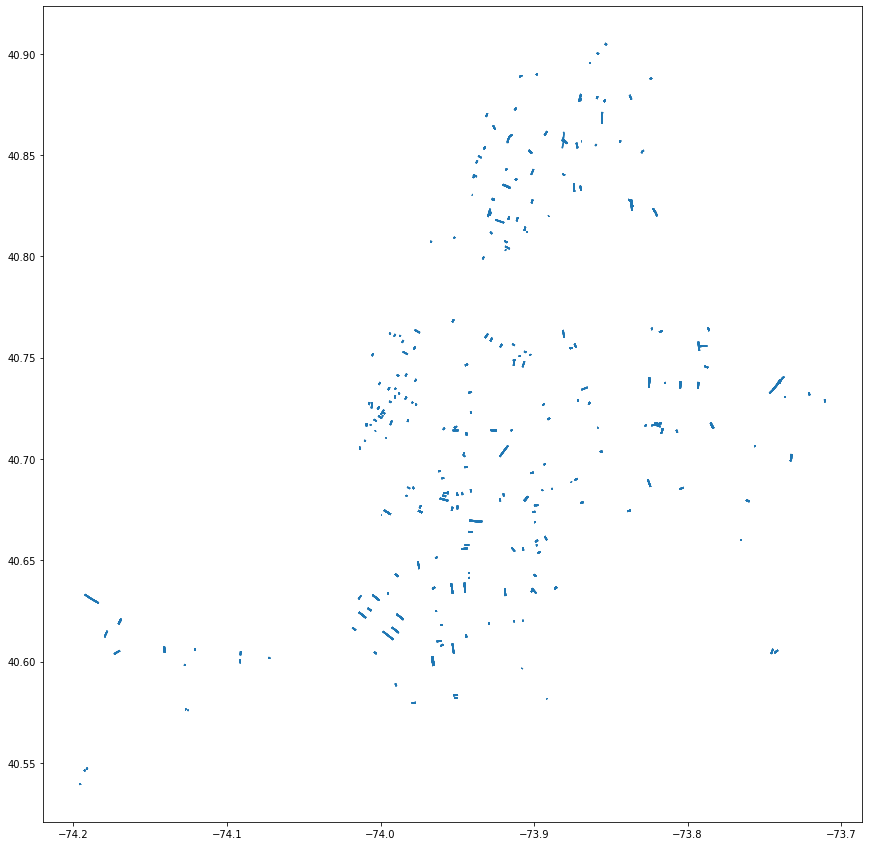

In [56]:
geo_data = gpd.GeoDataFrame(my_df, geometry='geometry')
geo_data.plot(figsize=(30, 15))

In [57]:
geo_data.to_file("sel_streets_2.geojson", driver='GeoJSON')